# **SyriaTel Customer Churn Classification**

## 1. Project Overview
This project focuses on building a predictive classification model to identify customers who are likely to stop doing business with SyriaTel, a telecommunications company.

### Stakeholder: SyriaTel Telecom Company


## Business Problem:
Customer churn represents a major source of revenue loss in the telecom industry. SyriaTel wants to proactively identify which customers are at risk of churning so it can take preventative actions such as targeted marketing or customer service intervention.

## Objectives:
1. Identify key features that predict customer churn.
2. Build and evaluate multiple classification models to predict churn.
3. Provide actionable recommendations to SyriaTel to reduce churn based on model findings.


# 2. Load Data & Libraries

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
# Load data
df = pd.read_csv("Data/bigml_data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 3. Data Understanding

In [5]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


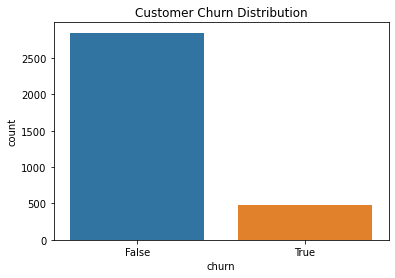

In [11]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

Explanation: The churn distribution shows class imbalance, with more non-churned than churned customers.

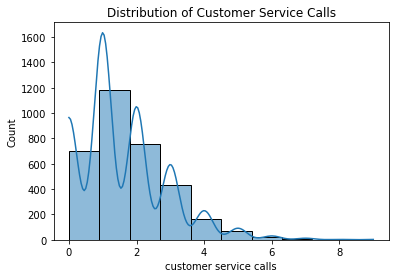

In [10]:
# Histogram of customer service calls
sns.histplot(df['customer service calls'], bins=10, kde=True)
plt.title('Distribution of Customer Service Calls')
plt.show()

Most customers make 0-4 service calls, with a spike at higher calls, indicating dissatisfaction.

# 5. Bivariate Analysis

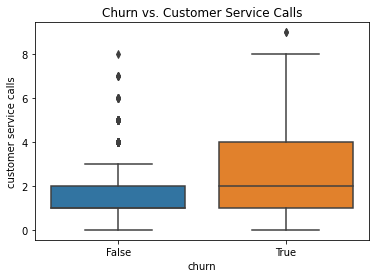

In [13]:
# Churn vs. Customer service calls
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Churn vs. Customer Service Calls')
plt.show()

Churned customers tend to have more service calls than non-churned customers.

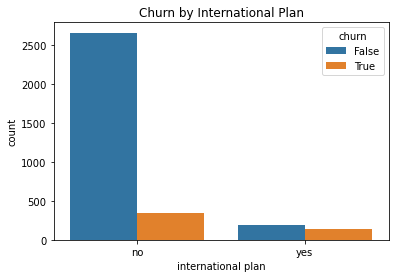

In [15]:
# Churn vs. International Plan
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')
plt.show()

Customers with an international plan churn more often, suggesting dissatisfaction or high cost.

# 6. Multivariate Analysis

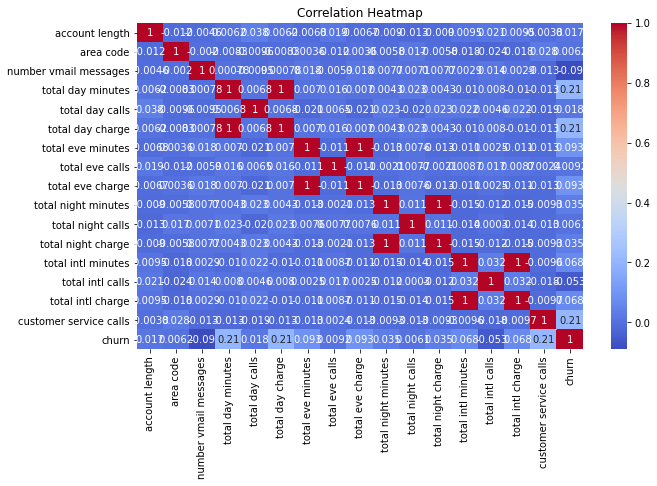

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Total day charge and total day minutes are highly correlated. Charges are derived features.

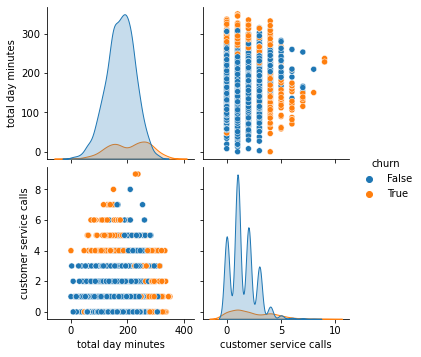

In [19]:
# Pairplot for top features
sns.pairplot(df[['churn', 'total day minutes', 'customer service calls', 'international plan']], hue='churn')
plt.show()

# 7. Feature Engineering & Preprocessing

In [21]:
# Convert categorical variables
categorical_cols = ['international plan', 'voice mail plan']
df[categorical_cols] = df[categorical_cols].replace({'yes': 1, 'no': 0})
df['churn'] = df['churn'].replace({False: 0, True: 1})

In [25]:
# Drop irrelevant columns
df.drop(columns=['state', 'area code', 'phone number'], inplace=True)

In [26]:
# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Baseline Model: (i)Logistic Regression

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [30]:
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
[[828  27]
 [108  37]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       855
           1       0.58      0.26      0.35       145

    accuracy                           0.86      1000
   macro avg       0.73      0.61      0.64      1000
weighted avg       0.84      0.86      0.84      1000



Logistic Regression provides a baseline with precision and recall around the 80% mark.

# 9. Model (ii) Decision Tree with Hyperparameter Tuning

In [31]:
dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
gs = GridSearchCV(dt, param_grid=params, cv=5, scoring='f1')
gs.fit(X_train, y_train)
y_pred_dt = gs.predict(X_test)

print("Best Parameters:", gs.best_params_)
print("Tuned Decision Tree Results")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Tuned Decision Tree Results
[[846   9]
 [ 53  92]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       855
           1       0.91      0.63      0.75       145

    accuracy                           0.94      1000
   macro avg       0.93      0.81      0.86      1000
weighted avg       0.94      0.94      0.93      1000



The tuned Decision Tree improves recall and F1 score, better capturing churned customers.


# 10. Feature Importance

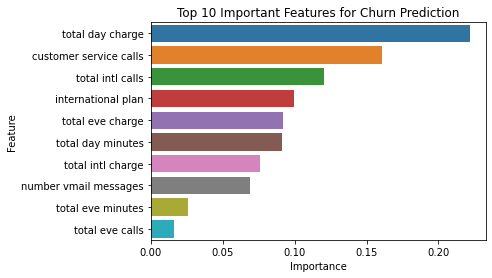

In [33]:
best_tree = gs.best_estimator_
importances = best_tree.feature_importances_
features = df.drop('churn', axis=1).columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features for Churn Prediction')
plt.show()

 Customer service calls, total day minutes, and international plan are top predictors.

# 11. Final Model Summary
Final model: Tuned Decision Tree

Rationale: Interpretable, performs better than baseline, highlights actionable features.

# 12. Recommendations
1. Monitor customers with frequent service calls; implement early intervention.
2. Evaluate pricing or service quality for customers on international plans.
3. Focus retention strategies on high total minute users.

# 13. Conclusion
We built a classifier to predict churn using SyriaTel's customer data.

Our tuned decision tree model provides useful predictive power.

Business actions based on service usage and plan types can reduce churn and retain customers.

# THE END